In [3]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.ticker import MultipleLocator, FuncFormatter
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import xarray as xr
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



In [4]:
fn = '/usr/people/ijzerman/GradProject/DataFiles/deptho/deptho_Ofx_EC-Earth3_piControl_r1i1p1f1_gn.nc'
ds = xr.open_dataset(fn)


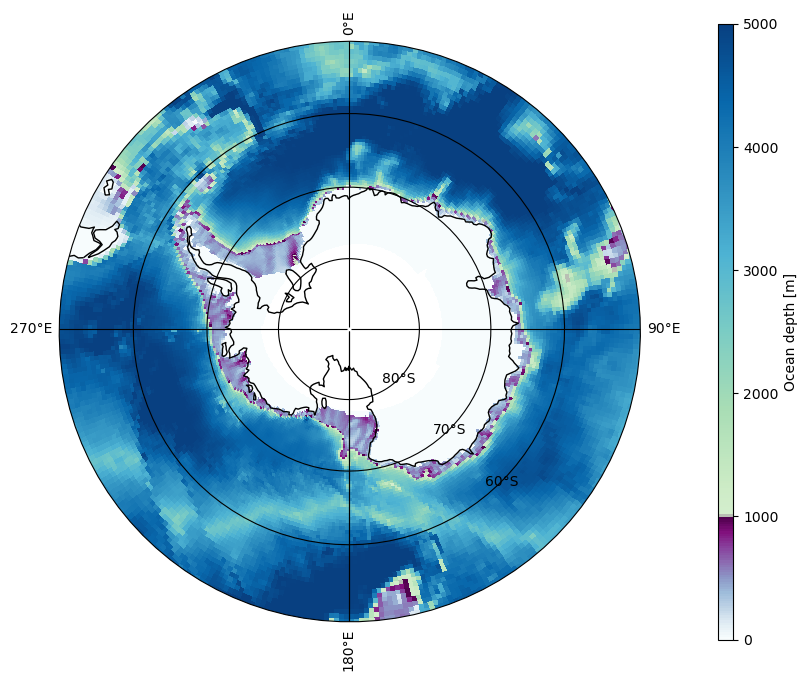

In [5]:
'''This code makes a map of the bathymetry of Antarctica (but it can take any dataset in principle), 
while providing control over the grid line parameters like the location, interval, and colour. 
I have not managed to control the location of the grid line labels.'''

#function to get all ticks labeled in degrees E, starting at 0.
def format_lon_ticks(x, pos):
    if x >= 0:
        return f"{x:.0f}°E"
    else:
        return f"{360 + x:.0f}°E"

fig = plt.figure(figsize=[10, 8])
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
# Limit the map to -60 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
# Customize grid lines and labels
gl = ax1.gridlines(draw_labels=True, linestyle='-', color = 'black') #control the grid line properties from here
# Customize grid lines and labels
gl.xlocator = plt.MultipleLocator(base=90) #controls the interval of longitude lines
gl.ylocator = plt.MultipleLocator(base=10) #controls the interval of latitude lines
gl.xformatter = FuncFormatter(format_lon_ticks)
gl.yformatter = LATITUDE_FORMATTER

ax1.coastlines()

#making circular plot
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax1.set_boundary(circle, transform=ax1.transAxes)

#making double colourbar
shallows = plt.cm.BuPu(np.linspace(0, 1000, 100)/1000) #do not forget to normalise your colourbar(the \1000 part)
deeps = plt.cm.GnBu(np.linspace(1000, 5000, 400)/5000)

colors = np.vstack((shallows, deeps))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

#actual plotting of dataset
im = ax1.pcolormesh(ds.longitude, ds.latitude,
                     ds.deptho, vmax = 5000,
                     cmap= mymap, 
                     transform=ccrs.PlateCarree())
cbar = plt.colorbar(im, ax=ax1, pad=0.1, aspect=40)
cbar.set_label('Ocean depth [m]')
#plt.title('Antarctic bathymetry with cross-sections', fontsize = 16) #in case you want a title
plt.show()

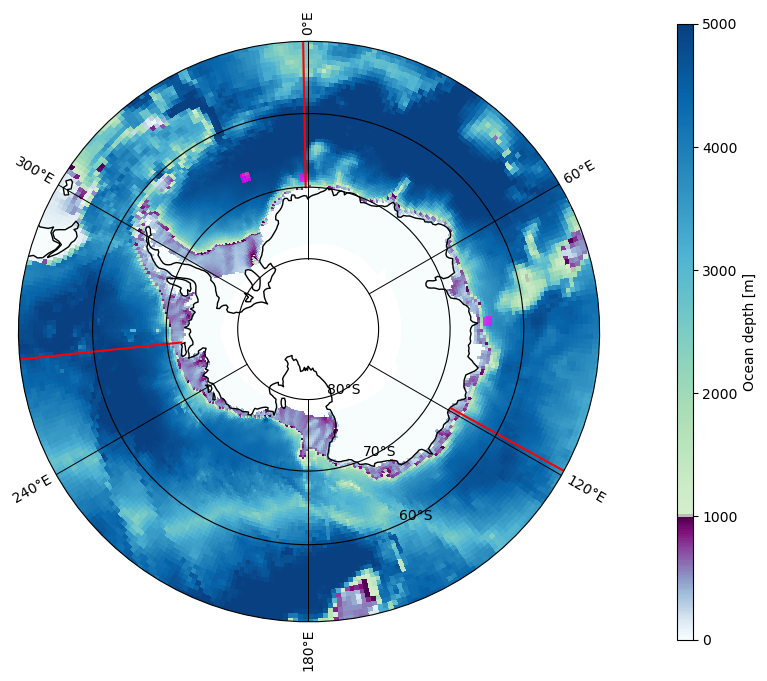

In [11]:
def format_lat_ticks(y, pos):
    return f"{-y:.0f}°S"

fig = plt.figure(figsize=[10, 8])
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Limit the map to -50 degrees latitude and below.
ax1.set_extent([-180, 180, -80, -50], ccrs.PlateCarree()) 

# Customize grid lines and labels
gl = ax1.gridlines(draw_labels=True, linestyle='-', color='black')

# Customize longitude grid
lon_values = [-180, -120, -60, 0, 60, 120, 180]  # Adjusted longitude grid
gl.xlocator = plt.FixedLocator(lon_values)
gl.xformatter = FuncFormatter(format_lon_ticks)

# Customize latitude grid
gl.ylocator = plt.MultipleLocator(base=10)  # Adjusted latitude grid
gl.yformatter = FuncFormatter(format_lat_ticks)

# Hide latitude grid lines below 80 degrees South
gl.ylines = True # Show latitude grid lines
gl.xlines = False # Do not show longitude grid liens
for lon in lon_values: # Adjusting the y-coordinate of longitude grid lines to end at 80 degrees South
    ax1.plot([lon, lon], [-80, -50], color='black', linewidth = 0.7, transform=ccrs.PlateCarree())

#plotting locations of cross-sections (or areas if desired) on specific indices in the data
#first [,] controls the longitude  index, second [,] controls the latitude index of the area
ax1.plot([119, 119], [-67, -50], color='red', linewidth = 1.5, transform=ccrs.PlateCarree())
ax1.plot([264, 264], [-72, -50], color='red', linewidth = 1.5, transform=ccrs.PlateCarree())
ax1.plot([359, 359], [-70, -50], color='red', linewidth = 1.5, transform=ccrs.PlateCarree())

ax1.coastlines()

#making circular plot
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax1.set_boundary(circle, transform=ax1.transAxes)

#making segmented colour map
shallows = plt.cm.BuPu(np.linspace(0, 1000, 100)/1000)
deeps = plt.cm.GnBu(np.linspace(1000, 5000, 400)/5000)

colors = np.vstack((shallows, deeps))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

#actual plotting of bathymetry or other type of data
im = ax1.pcolormesh(ds.longitude, ds.latitude,
                     ds.deptho, vmax=5000,
                     cmap=mymap,
                     transform=ccrs.PlateCarree())
cbar = plt.colorbar(im, ax=ax1, pad=0.1, aspect=40)
cbar.set_label('Ocean depth [m]')

#these blocks plot specific grid cells in a different colour using the available dataset, alpha controls the opacity.
#for now, it plots three 3*3 blocks in magenta in the map in the figure. 
#loc 1
jidx = range(39,42)
iidx = range(264,267)
ds_sel = ds.deptho.isel(i = iidx).isel(j = jidx)
im = ax1.pcolormesh(ds_sel.longitude, ds_sel.latitude,
                    ds_sel,
                    cmap = 'spring', vmin = 4900, vmax = 5000, alpha = 0.7, 
                    transform=ccrs.PlateCarree()
)

#loc2
jidx = range(34,37) 
iidx = range(285,288)
ds_sel = ds.deptho.isel(i = iidx).isel(j = jidx)
im = ax1.pcolormesh(ds_sel.longitude, ds_sel.latitude,
                    ds_sel,
                    cmap = 'spring', vmin = 4900, vmax = 5000, alpha = 0.7, 
                    transform=ccrs.PlateCarree()
)

#loc2
jidx = range(44,47) 
iidx = range(14,17) 
ds_sel = ds.deptho.isel(i = iidx).isel(j = jidx)
im = ax1.pcolormesh(ds_sel.longitude, ds_sel.latitude,
                    ds_sel,
                    cmap = 'spring', vmin = 4900, vmax = 5000, alpha = 0.7, 
                    transform=ccrs.PlateCarree()
)
plt.show()

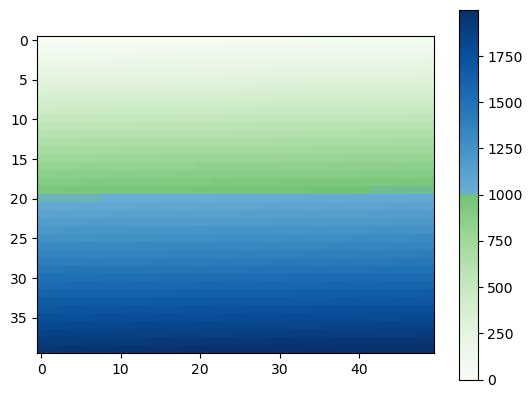

In [9]:
"""Some code I used to play around with segmented colour bars, can be used to test out segmentation and colourmaps."""

from random import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

n=11
tab=np.arange(0,2000).reshape(40,50)

# 50 values for later use from 0 to 1
greens = cm.Greens(np.linspace(0,1000, num=50)/2000)
# 50 values red for later use from 1.5 to 2.5 
red = cm.Blues(np.linspace(1000,2000, num=50)/2000)


colors = np.vstack((greens, red))
# in total we now have 175 colors in the colormap
mycmap = mcolors.LinearSegmentedColormap.from_list('colormapp', colors)

im = plt.imshow(tab, cmap = mycmap, interpolation="none")
cb = plt.colorbar(im)

plt.show()